In [1]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("./data/train_df.csv", index_col=0)
val_df = pd.read_csv("./data/validation_df.csv", index_col=0)
test_df = pd.read_csv("./data/test_df.csv", index_col=0)

In [3]:
train_df.D.value_counts()
test_df.D.value_counts()
# val_df.D.value_counts()

D
1    5131
0    4865
Name: count, dtype: int64

In [4]:
train_df["OLIG_PROTE_CD"].unique()

array([1., 5., 4., 2., 3., 6.])

In [5]:
data = train_df.drop(["BLDS", "D"], axis=1)
target = train_df["D"]

In [6]:
data.head()

,SEX,AGE_GROUP,BP_LWST,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,BMI
0,2,14,78.0,265.0,38.0,125.0,14.0,1.0,0.0,24.0,18.0,1.0,27.343750
1,2,11,92.0,91.0,82.0,171.0,14.0,5.0,0.0,22.0,20.0,1.0,27.343750
2,1,12,82.0,118.0,31.0,98.0,13.0,1.0,0.0,32.0,28.0,1.0,24.221453
3,1,12,85.0,84.0,62.0,109.0,14.0,1.0,0.0,48.0,41.0,1.0,20.811655
4,2,9,83.0,66.0,56.0,140.0,12.0,1.0,0.0,17.0,13.0,1.0,25.390625


In [7]:
target.head()
target.value_counts()

D
0    31900
1    31609
Name: count, dtype: int64

In [8]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.1, stratify=target
)
xgb_model = xgboost.XGBClassifier(
    n_estimators=100,
    learning_rate=0.08,
    gamma=0,
    subsample=0.75,
    colsample_bytree=0.8,
    max_depth=7,
)

print(len(X_train), len(X_test))
xgb_model.fit(X_train, y_train)

57158 6351


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

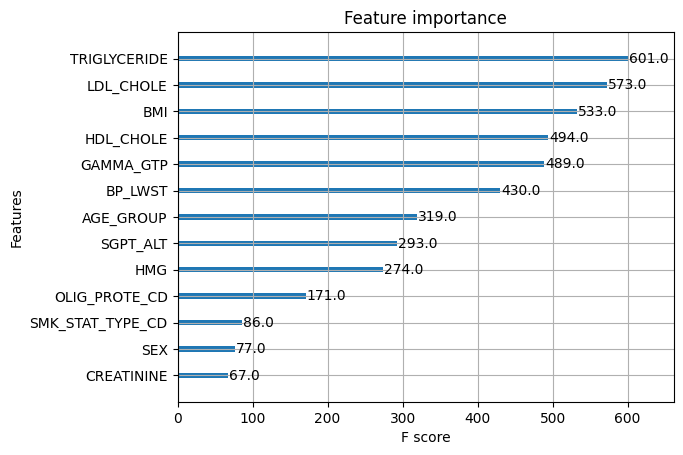

In [9]:
xgboost.plot_importance(xgb_model)

In [10]:
predictions = xgb_model.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 0, 0])

In [11]:
predictions.sum()

2916

In [12]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions, y_test))

0.9560166555862697
0.8176779021730232


In [13]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
len(predictions)
len(y_test)

6351

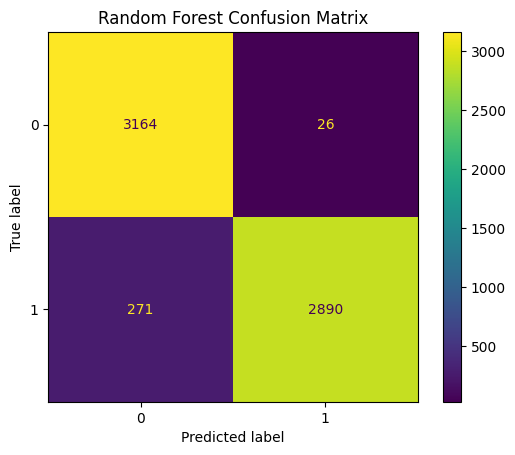

Accuracy: 0.9532357109116675
Precision: 0.9910836762688614
Recall: 0.91426763682379
F1 score: 0.9511272009215074


In [15]:
cm = confusion_matrix(y_test, predictions)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, predictions)

# Calculate the precision.
precision = metrics.precision_score(y_test, predictions)

# Calculate the recall.
recall = metrics.recall_score(y_test, predictions)

# Calculate the F1 score.
f1_score = metrics.f1_score(y_test, predictions)

# Print the results.
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Random Forest 모델 생성
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# 모델 학습
rf_clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
rf_predictions = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, rf_predictions)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9531


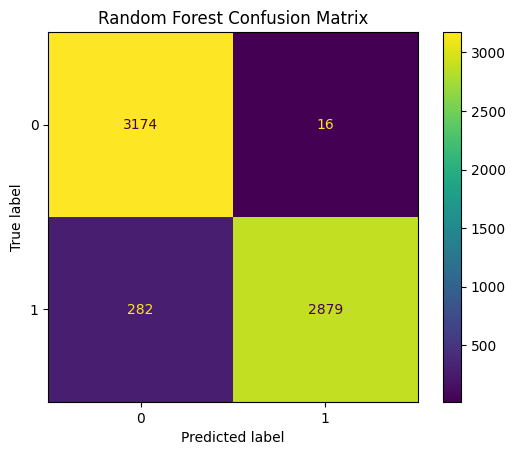

Random Forest Model Performance:
Accuracy: 0.9530782553928515
Precision: 0.9944732297063903
Recall: 0.9107877254033534
F1 score: 0.9507926023778072


In [17]:
rf_cm = confusion_matrix(y_test, rf_predictions)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, rf_predictions)

# Calculate the precision.
precision = metrics.precision_score(y_test, rf_predictions)

# Calculate the recall.
recall = metrics.recall_score(y_test, rf_predictions)

# Calculate the F1 score.
f1_score = metrics.f1_score(y_test, rf_predictions)

# Print the results.
print("Random Forest Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

In [18]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver="adam", hidden_layer_sizes=100, random_state=1)
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)
mlp_score = mlp.score(X_train, y_train)
print(mlp_score)

0.9205710486721019


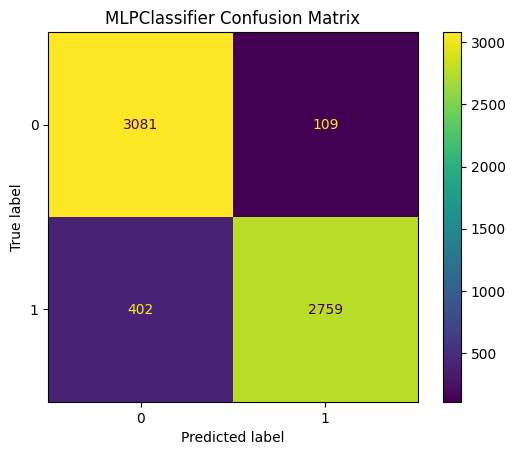

MLPClassifier Model Performance:
Accuracy: 0.9195402298850575
Precision: 0.9619944211994421
Recall: 0.8728250553622271
F1 score: 0.9152429922043456


In [19]:
mlp_cm = confusion_matrix(y_test, mlp_predictions)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm)
disp.plot()
plt.title('MLPClassifier Confusion Matrix')
plt.show()

# Calculate the accuracy.
mlp_accuracy = metrics.accuracy_score(y_test, mlp_predictions)

# Calculate the precision.
mlp_precision = metrics.precision_score(y_test, mlp_predictions)

# Calculate the recall.
mlp_recall = metrics.recall_score(y_test, mlp_predictions)

# Calculate the F1 score.
mlp_f1_score = metrics.f1_score(y_test, mlp_predictions)

# Print the results.
print("MLPClassifier Model Performance:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 score:", mlp_f1_score)

In [20]:
Y_test = test_df["D"]
Y_test.to_csv("./data/Answer.csv")